In [1]:
#
# Import libraries
#

#
# numpy, scipy, and matploblib come pre-installed with Anaconda.
# 
# But "sounddevice" does not. When running for the first time, install it as follows:
#
# Step 1:
# Windows: Open "Anaconda Prompt" from Windows start menu. (can also click the "CMD.exe" button in Anaconda Navigator)
# Mac: Open the "Terminal" app.
#
# Step 2: Type the following command, and hit <Enter>:
#
# conda install -c conda-forge python-sounddevice
#
# You should see a lot of text while it installs. It may prompt you whether to proceed or not (say yes).
# This will take about 1 minute total.
#

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sounddevice as sd



In [2]:
#
# Load waveform from file
#

wave = np.load('../Class2/wav2.npy')

sampleRate = 44100

# Report result to user
print(f'Loaded waveform with {wave.size} samples.')
print(f'Waveform has duration {wave.size / sampleRate} seconds.')

Loaded waveform with 441000 samples.
Waveform has duration 10.0 seconds.


In [3]:
#
# Downsample by 4x
#
# This reduces the size of the waveform vector, reducing by 4x the computational resources needed to filter it.
#
# Net result: code runs 4x faster.
#

# Downsample ratio
DOWNSAMPLE_RATIO = 0.25

# Perform downsampling
wave = signal.resample(wave, int(wave.size * DOWNSAMPLE_RATIO))

print(f'Downsampled wave consists of {wave.size} samples.')

# Recalculate sample rate for later use
sampleRate = sampleRate * DOWNSAMPLE_RATIO

Downsampled wave consists of 110250 samples.


In [4]:
#
# Play through computer speaker
#

# Normalize peak amplitude to 1. This is because audio player will clip values > 1
wave = wave / max(wave)

print(f'Playing wave.')
VOLUME = 0.25
sd.play(wave * VOLUME, sampleRate)

Playing wave.


Text(0, 0.5, 'Amplitude')

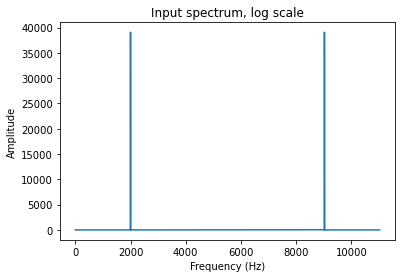

In [5]:

# Calculate FFT of raw waveform.
f = np.abs(np.fft.fft(wave))  # Absolute value allows us to ignore phase

# plot FFT vs frequency
freq_list = np.linspace(0, sampleRate, num=f.size, endpoint = False)   # list of frequencies
plt.plot(freq_list, f)
# plt.xscale('log')
plt.title('Input spectrum, log scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In [6]:
#
# Implement simple (and barely adequate) low-pass filter
#

# Filter order. Larger order makes better filter, but slower.
# This should be an odd, not even, number
order = 101

# Nyquist limit is half the sample rate
nyquistRate = sampleRate / 2

# Generate filter "kernel", which will be convolved with input wave
kernel = signal.firwin(order, np.array([1500])/nyquistRate)

print(f'Calculating convolution. Might take a few seconds if filter order is large ...')
wave_Filtered = np.convolve(wave, kernel)

print(f'Done!')

Calculating convolution. Might take a few seconds if filter order is large ...
Done!


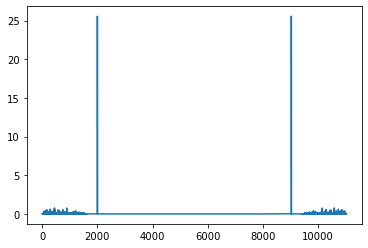

In [7]:
#
# Calculate FFT of filtered waveform.
#

# We take absolute value to convert complex numbers into real
f_filtered = np.abs(np.fft.fft(wave_Filtered))  

# Generate list of frequency values from 0 to sample rate.
# The number of frequency values is the same as the number of waveform samples
freq_list_filtered = np.linspace(0, sampleRate, num=f_filtered.size, endpoint = False)

# plot FFT vs frequency
plt.plot(freq_list_filtered, f_filtered)


In [8]:
#
# Play filtered result through computer speaker
#

print(f'Playing filtered wave through computer speaker.')

# Normalize amplitude to 1, again to satisfy audio player.
sd.play(wave_Filtered / max(wave_Filtered), sampleRate)

Playing filtered wave through computer speaker.
